In [1]:
import utils
import utils.optm as optm
import utils.lossfunc as lf
import numpy as np
import torch
from importlib import reload

/home/user/miniconda3/envs/py39/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/user/miniconda3/envs/py39/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


In [2]:
np.arange(10)[:-1]

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [3]:
X = np.random.rand(16).reshape(4, 4)-0.5
X = X + X.T + np.eye(4)
def callbackF(x, f, context):
    print("target value : {:.5f} in the context {}".format(f,context))

In [4]:
reload(optm)
reload(lf)
U = optm.unitary_solver([2, 2], syms = True, dtype=torch.float64)
func = optm.unitary_optm(X, N = 2, dtype=np.float64)
import scipy.optimize as optimize
# bounds = [[0, 20]] + [[0, np.pi] for _ in range(func.n_params-2)] + [[0, 2*np.pi]]
bounds = [[0, 10]]
ret = optimize.dual_annealing(func, bounds = bounds, restart_temp_ratio = 1e-5, visit = 2.7, initial_temp = 10**3, maxiter = 1000, callback = callbackF)

lps = 2, N = 2


In [13]:
func = optm.unitary_optm(X, N = 2, dtype=np.complex128)
np.linalg.det(func.matrix())

lps = 2, N = 2


(1.0000000000000002-1.757992187934124e-17j)

### Check periodicity

### 1 dimensional parameter

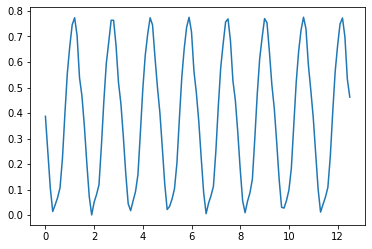

In [8]:
from matplotlib import pyplot as plt
t_list=np.arange(0, 4*np.pi, 0.1)
res = []
for t in t_list:
    res.append(func([t]))
fig, ax = plt.subplots()
ax.plot(t_list, res)
fig.show()

### 6-d parameter

lps = 4, N = 1


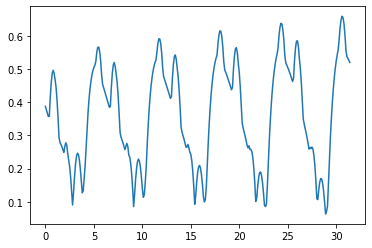

In [9]:
func = optm.unitary_optm(X,index = np.array([0]), N = 1, dtype=np.float64)
from matplotlib import pyplot as plt
t_list=np.arange(0, 10*np.pi, 0.1)
res = []
for t in t_list:
    res.append(func([t]))
#     print(np.linalg.norm(func.coord))
fig, ax = plt.subplots()
ax.plot(t_list, res)
fig.show()

# unitary vs orthogonal

## 4D real-symmetric matrix

In [2]:
def callbackNone(x, f, context):
#     print("target value : {:.5f} in the context {}".format(f,context))
    pass
reload(optm)
reload(lf)
from tqdm.auto import tqdm
import scipy.optimize as optimize


check if actually find the best basis when no restriction on orthogonal or unitary

In [102]:
N = 50
L = 4
t_float = []
for _ in tqdm(range(N)):
    X = np.random.rand(L*L).reshape(L, L)-0.5
    X = X + X.T + np.eye(L)
    func = optm.unitary_optm(X, N = 1, dtype=np.float64)
    bounds = [[-10, 10]]*func.n_params
    ret = optimize.dual_annealing(func, bounds = bounds, restart_temp_ratio = 1e-3,
                                  visit = 2.7, initial_temp = 10**2, maxiter = 100,
                                  callback = callbackNone)
    t_float.append(ret.fun)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:13<00:00,  3.66it/s]


In [103]:
N = 50
L = 4
t_comp = []
for _ in tqdm(range(N)):
    X = np.random.rand(L*L).reshape(L, L)-0.5
    X = X + X.T + np.eye(L)
    func = optm.unitary_optm(X, N = 1, dtype=np.complex128)
    bounds = [[-10, 10]]*func.n_params
    ret = optimize.dual_annealing(func, bounds = bounds, restart_temp_ratio = 1e-3,
                                  visit = 2.7, initial_temp = 10**2, maxiter = 100,
                                  callback = callbackNone)
    t_comp.append(ret.fun)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:50<00:00,  1.01s/it]


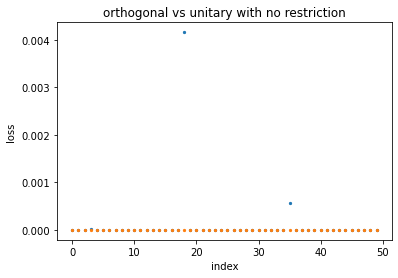

In [109]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()

ax.scatter(np.arange(50), t_comp, s = 5,  label = "complex")
ax.scatter(np.arange(50), t_float, s = 5, label = "float")
ax.set_title('orthogonal vs unitary with no restriction')
ax.set_xlabel('index')
ax.set_ylabel('loss ')
fig.show()
plt.savefig('without_res.jpg', dpi=400, bbox_inches="tight")

### Next check with tensor-product-form unitary matrix

In [158]:
import scipy.optimize as optimize
bounds = [[-10, 10]]*func.n_params
    
N = 1000
L = 4
t_float = []
t_comp = []
X_list = []
for _ in tqdm(range(N)):
    X = np.random.rand(L*L).reshape(L, L)-0.5
    X = X + X.T + np.eye(L)
    X_list.append(X)
    func = optm.unitary_optm(X, N = 2, dtype=np.float64)
    bounds = [[-10, 10]]*func.n_params
    ret = optimize.dual_annealing(func, bounds = bounds, restart_temp_ratio = 1e-3,
                                  visit = 2.7, initial_temp = 10**2, maxiter = 100,
                                  callback = callbackNone)
    t_float.append(ret.fun)
    
    func = optm.unitary_optm(X, N = 2, dtype=np.complex128)
    bounds = [[-10, 10]]*func.n_params
    ret = optimize.dual_annealing(func, bounds = bounds, restart_temp_ratio = 1e-3,
                                  visit = 2.7, initial_temp = 10**2, maxiter = 100,
                                  callback = callbackNone)
    t_comp.append(ret.fun)
        

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:25<00:00,  3.77it/s]


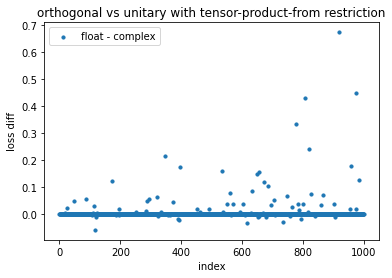

In [159]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()

diff = np.array(t_float) - np.array(t_comp)
ax.scatter(np.arange(N), diff, s = 10,  label = "float - complex")

ax.set_title('orthogonal vs unitary with tensor-product-from restriction')
ax.set_xlabel('index')
ax.set_ylabel('loss diff')
ax.legend()
fig.show()
plt.savefig('res1.jpg', dpi=400, bbox_inches="tight")

### Check deeply, with more iterations and inital_temperature

In [160]:
X = X_list[np.argmax(diff)]

t2_float = []
t2_comp = []
ori_diff = []
for i in tqdm(range(N)):
    if abs(diff[i]) > 1E-2:
        ori_diff.append(diff[i])
        X = X_list[i]
        func = optm.unitary_optm(X, N = 2, dtype=np.float64)
        bounds = [[-10, 10]]*func.n_params
        ret_float = optimize.dual_annealing(func, bounds = bounds, restart_temp_ratio = 1e-3,
                                      visit = 2.6, initial_temp = 10**3, maxiter = 500,
                                      callback = callbackNone)


        func = optm.unitary_optm(X, N = 2, dtype=np.complex128)
        bounds = [[-10, 10]]*func.n_params
        ret_comp = optimize.dual_annealing(func, bounds = bounds, restart_temp_ratio = 1e-3,
                                      visit = 2.6, initial_temp = 10**3, maxiter = 500,
                                      callback = callbackNone)
        t2_float.append(ret_float.fun)
        t2_comp.append(ret_comp.fun)        

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:55<00:00, 18.15it/s]


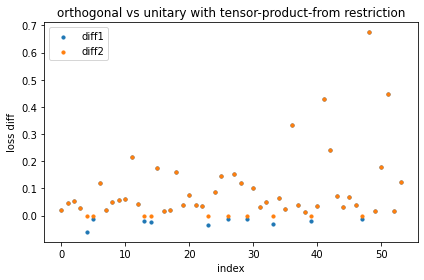

In [161]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()

diff2 = np.array(t2_float) - np.array(t2_comp)
N2 = len(diff2)
ax.scatter(np.arange(N2), ori_diff, s = 10,  label = "diff1")
ax.scatter(np.arange(N2), diff2, s = 10,  label = "diff2")

ax.set_title('orthogonal vs unitary with tensor-product-from restriction')
ax.set_xlabel('index')
ax.set_ylabel('loss diff')
ax.legend()
plt.tight_layout()
fig.show()
plt.savefig('res2.jpg', dpi=400, bbox_inches="tight")

## Higher dimension 6D

In [111]:
N = 30
L = 6
t_float = []
for _ in tqdm(range(N)):
    X = np.random.rand(L*L).reshape(L, L)-0.5
    X = X + X.T + np.eye(L)
    func = optm.unitary_optm(X, N = 1, dtype=np.float64)
    bounds = [[-10, 10]]*func.n_params
    ret = optimize.dual_annealing(func, bounds = bounds, restart_temp_ratio = 1e-3,
                                  visit = 2.7, initial_temp = 10**2, maxiter = 100,
                                  callback = callbackNone)
    t_float.append(ret.fun)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:32<00:00,  1.08s/it]


In [112]:
t_comp = []
for _ in tqdm(range(N)):
    X = np.random.rand(L*L).reshape(L, L)-0.5
    X = X + X.T + np.eye(L)
    func = optm.unitary_optm(X, N = 1, dtype=np.complex128)
    bounds = [[-10, 10]]*func.n_params
    ret = optimize.dual_annealing(func, bounds = bounds, restart_temp_ratio = 1e-3,
                                  visit = 2.7, initial_temp = 10**2, maxiter = 100,
                                  callback = callbackNone)
    t_comp.append(ret.fun)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [02:35<00:00,  5.17s/it]


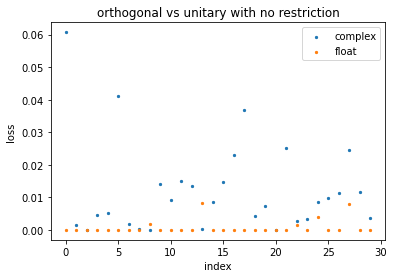

In [120]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()

ax.scatter(np.arange(N), t_comp, s = 5,  label = "complex")
ax.scatter(np.arange(N), t_float, s = 5, label = "float")
ax.set_title('orthogonal vs unitary with no restriction')
ax.set_xlabel('index')
ax.set_ylabel('loss ')
ax.legend()
fig.show()
plt.savefig('without_res_6D.jpg', dpi=400, bbox_inches="tight")

In [141]:
import scipy.optimize as optimize
    
N = 10
L = 9
t_float = []
t_comp = []
X_list = []
for _ in tqdm(range(N)):
    X = np.random.rand(L*L).reshape(L, L)-0.5
    X = X + X.T + np.eye(L)
    X_list.append(X)
    func = optm.unitary_optm(X, N = 2, dtype=np.float64)
    bounds = [[-10, 10]]*func.n_params
    ret = optimize.dual_annealing(func, bounds = bounds, restart_temp_ratio = 1e-3,
                                  visit = 2.7, initial_temp = 10**3, maxiter = 300,
                                  callback = callbackNone)
    t_float.append(ret.fun)
    
    func = optm.unitary_optm(X, N = 2, dtype=np.complex128)
    bounds = [[-10, 10]]*func.n_params
    ret = optimize.dual_annealing(func, bounds = bounds, restart_temp_ratio = 1e-3,
                                  visit = 2.7, initial_temp = 10**3, maxiter = 500,
                                  callback = callbackNone)
    t_comp.append(ret.fun)
        

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:35<00:00,  3.52s/it]


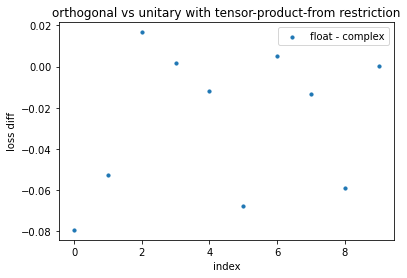

In [143]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()

diff = np.array(t_float) - np.array(t_comp)
ax.scatter(np.arange(N), diff, s = 10,  label = "float - complex")

ax.set_title('orthogonal vs unitary with tensor-product-from restriction')
ax.set_xlabel('index')
ax.set_ylabel('loss diff')
ax.legend()
fig.show()
plt.savefig('res1_9D.jpg', dpi=400, bbox_inches="tight")